## Muhammad Ali Zulfikar
### TI-3H
### 24

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

Import semua data dari dataset voice

In [81]:
df = pd.read_csv('dataset/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [82]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [84]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Terlihat data sudah aman, tidak perlu membenarkan masalah `null`, selanjutnya kita  akan coba melakukan encoding terhadap label

In [85]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

Mengubah male dan female menjadi angka 0 dan 1

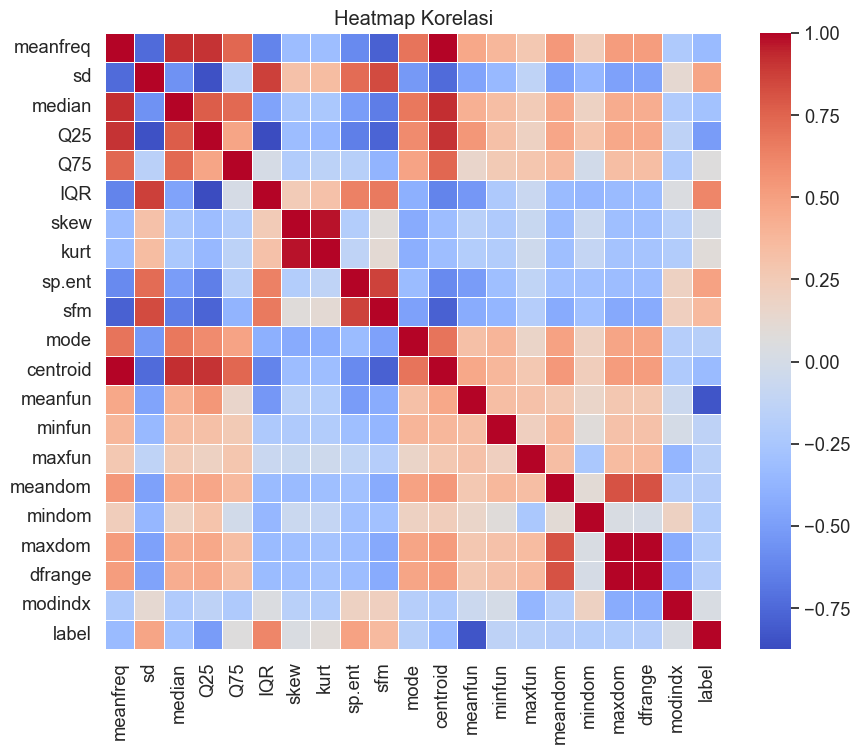

In [86]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr() 
sns.set(font_scale=1.2) 
sns.heatmap(corr_matrix, 
            cmap='coolwarm',
            linewidths=0.5, 
            fmt=".2f",
            cbar=True, 
            square=True) 

plt.title('Heatmap Korelasi') 
plt.show()


In [87]:
df.drop(['dfrange', 'centroid'], axis=1, inplace=True)

In [88]:
X = df[df.columns.difference(['label'])]
y = df['label']

In [89]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.21477826, -2.57610164, -5.69360723, ...,  0.4715753 ,
         2.29330585, -0.03908279],
       [-0.25848536, -2.48688452, -5.58898726, ...,  0.59443122,
         4.54805598, -0.06523603],
       [ 0.90932569, -2.7069865 , -3.92869875, ...,  0.39826097,
         6.51365636, -1.08373029],
       ...,
       [ 2.49266553, -2.1990394 , -0.01712269, ...,  1.38585653,
        -0.29804429,  1.15019826],
       [ 2.15365344, -1.99185206, -0.20402146, ...,  1.50571108,
        -0.36536651,  1.22984967],
       [ 2.25467137, -1.44608897,  1.10267866, ...,  1.08912637,
        -0.33848726,  0.97175912]])

Text(0, 0.5, 'No. of persons')

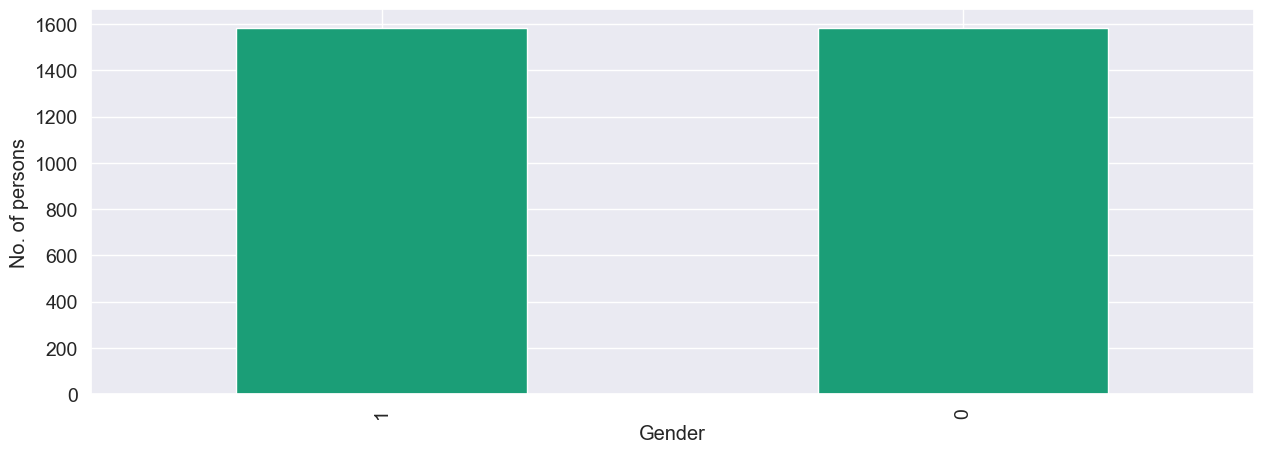

In [90]:
df['label'].value_counts().plot(kind='bar',figsize = (15,5),fontsize = 14,colormap='Dark2')
plt.xlabel('Gender')
plt.ylabel('No. of persons')

Melakukan split data set menjadi 30% dan 70%

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Import SVM Model

In [92]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC()

Melakukan prediksi dengan model SVC

In [93]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print(f'Accuracy Score : {int(acc * 100)}%')

Accuracy Score : 97%


## Accuracy Score

Didapatkan mencapai 97%

## Challenge 2

In [94]:
df = pd.read_csv('dataset/spam.csv', encoding='ISO-8859–1') 
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [95]:
df = df.drop(df.iloc[:, 2:], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
cols = {
    'v1' : 'Labels',
    'v2' : 'SMS'
}

df = df.rename(columns=cols)
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [97]:
labels = {
    'spam' : 1,
    'ham' : 0
}

df['Labels'] = df['Labels'].map(labels)
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
X = df['SMS'].values
y = df['Labels'].values

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(decode_error='ignore', stop_words='english')
X = cv.fit_transform(X)

Split dataset menjadi 2 bagian dengan train 70% dan test 30%

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

Melakukan import dan fit data menggunakan model MultinomialNB

In [101]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

print('training accuracy is --> ',model.score(X_train,y_train) * 100)
print('test accuracy is --> ',model.score(X_test,y_test) * 100)

training accuracy is -->  99.51282051282051
test accuracy is -->  97.54784688995215


Selanjutnya kita mencoba dengan TfidVectorizer dengan stop_words english

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(stop_words='english')

Mendapatkan data SMS untuk X dan y untuk Label supaya membedakan antara dependant dan independent variable

In [103]:
X = df['SMS'].values
y = df['Labels'].values

In [104]:
X = cv.fit_transform(X)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [106]:
model = MultinomialNB()
model.fit(X_train, y_train)

print('training accuracy is --> ',model.score(X_train,y_train) * 100)
print('test accuracy is --> ',model.score(X_test,y_test) * 100)

training accuracy is -->  98.17948717948718
test accuracy is -->  96.11244019138756
